In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *

DATA_DIR = '/work/users/k/4/k4thryn/Repos/OLD_EpSampling_Nov2024/data/'
DT = datetime.today().strftime('%Y%m%d-%H%M%S')

### <font color=blue> Transform target (and target-affecting) variables.

In [2]:
ts = '20241108-123515'

fpath = os.path.join(DATA_DIR,'processed',f'training_target_df_{ts}.csv')
df = pd.read_csv(fpath)
# drop nans
df.dropna(inplace=True)
fpath = os.path.join(DATA_DIR,'processed',f'training_acs_df_{ts}.csv')
df_acs = pd.read_csv(fpath)
df_acs.set_index('Fips',inplace=True,drop=True)
# standardize
df_acs = (df_acs-df_acs.mean()) / df_acs.std()

## TRANSFORM
county_transform = [x for x in df.columns if x.startswith('True_county_inc_deaths')]
county_transform += ['Naive_proj_deaths','Naive_true_deaths']
for var in county_transform:
    df[f'{var}_x'] = df.apply(lambda x: (x[var]) / x.Pop * 100000 , axis=1)
    
state_transform = ['Proj_state_inc_deaths','True_state_inc_deaths']
for var in state_transform:
    df[f'{var}_x'] = df.apply(lambda x: (x[var]) / x.State_pop * 100000, axis=1)
    
display(df)
print(df.columns)
# add in census features
df = df.merge(df_acs,on='Fips')

,Date,State_fips,Fips,Pop,State_pop,Ratio,Proj_state_inc_deaths,True_state_inc_deaths,True_county_cum_deaths,True_county_inc_deaths,...,True_county_inc_deaths_tm_6_x,True_county_inc_deaths_tm_7_x,True_county_inc_deaths_tm_8_x,True_county_inc_deaths_tm_9_x,True_county_inc_deaths_tm_10_x,True_county_inc_deaths_tm_11_x,Naive_proj_deaths_x,Naive_true_deaths_x,Proj_state_inc_deaths_x,True_state_inc_deaths_x
11,20200905,37,37001,169185,10367022,0.016320,157.0,205.0,46.0,0.0,...,0.591069,1.182138,0.000000,0.591069,0.591069,1.773207,1.514418,1.977424,1.514418,1.977424
12,20200912,37,37001,169185,10367022,0.016320,176.0,160.0,48.0,2.0,...,0.591069,0.591069,1.182138,0.000000,0.591069,0.591069,1.697691,1.543355,1.697691,1.543355
13,20200919,37,37001,169185,10367022,0.016320,157.0,187.0,48.0,0.0,...,0.000000,0.591069,0.591069,1.182138,0.000000,0.591069,1.514418,1.803797,1.514418,1.803797
14,20200926,37,37001,169185,10367022,0.016320,171.0,198.0,54.0,6.0,...,0.591069,0.000000,0.591069,0.591069,1.182138,0.000000,1.649461,1.909902,1.649461,1.909902
15,20201003,37,37001,169185,10367022,0.016320,171.0,189.0,56.0,2.0,...,1.182138,0.591069,0.000000,0.591069,0.591069,1.182138,1.649461,1.823089,1.649461,1.823089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,20220409,37,37199,18357,10367022,0.001771,55.0,43.0,51.0,0.0,...,0.000000,5.447513,5.447513,16.342540,5.447513,32.685079,0.530528,0.414777,0.530528,0.414777
9896,20220416,37,37199,18357,10367022,0.001771,41.0,76.0,51.0,0.0,...,5.447513,0.000000,5.447513,5.447513,16.342540,5.447513,0.395485,0.733094,0.395485,0.733094
9897,20220423,37,37199,18357,10367022,0.001771,60.0,29.0,51.0,0.0,...,0.000000,5.447513,0.000000,5.447513,5.447513,16.342540,0.578758,0.279733,0.578758,0.279733
9898,20220430,37,37199,18357,10367022,0.001771,33.0,42.0,51.0,0.0,...,0.000000,0.000000,5.447513,0.000000,5.447513,5.447513,0.318317,0.405131,0.318317,0.405131


Index(['Date', 'State_fips', 'Fips', 'Pop', 'State_pop', 'Ratio',
       'Proj_state_inc_deaths', 'True_state_inc_deaths',
       'True_county_cum_deaths', 'True_county_inc_deaths', 'Naive_proj_deaths',
       'Naive_true_deaths', 'True_county_inc_deaths_tm_4',
       'True_county_inc_deaths_tm_5', 'True_county_inc_deaths_tm_6',
       'True_county_inc_deaths_tm_7', 'True_county_inc_deaths_tm_8',
       'True_county_inc_deaths_tm_9', 'True_county_inc_deaths_tm_10',
       'True_county_inc_deaths_tm_11', 'True_county_inc_deaths_x',
       'True_county_inc_deaths_tm_4_x', 'True_county_inc_deaths_tm_5_x',
       'True_county_inc_deaths_tm_6_x', 'True_county_inc_deaths_tm_7_x',
       'True_county_inc_deaths_tm_8_x', 'True_county_inc_deaths_tm_9_x',
       'True_county_inc_deaths_tm_10_x', 'True_county_inc_deaths_tm_11_x',
       'Naive_proj_deaths_x', 'Naive_true_deaths_x', 'Proj_state_inc_deaths_x',
       'True_state_inc_deaths_x'],
      dtype='object')


### <font color=blue> Target variable exploration.

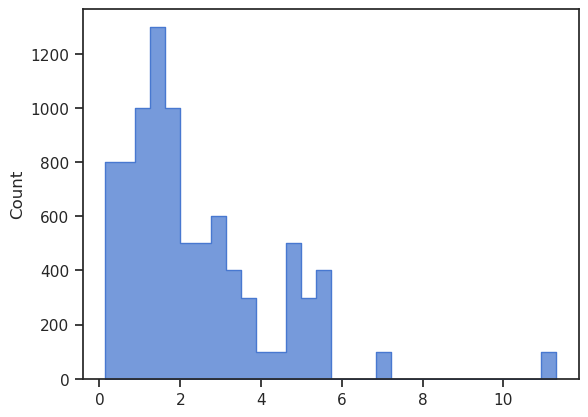

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1, style='ticks', palette='muted') 

sns.histplot(df.True_state_inc_deaths_x.values, bins=30, kde=False, element='step')
# sns.kdeplot(df.True_state_inc_deaths_x.values)
plt.show()

In [4]:
df.True_state_inc_deaths_x.describe()

count    8800.000000
mean        2.398230
std         1.840042
min         0.144690
25%         1.126167
50%         1.876141
75%         3.388148
max        11.305079
Name: True_state_inc_deaths_x, dtype: float64

### <font color=blue> How does training set size affect performance?

_Choose base "predictive" attributes_

In [5]:
%precision %.2f
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True) # don't use scientific notation

from epsampling.utils import get_chunks
from epsampling.modeling import get_date_chunked_splits, get_performance
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklego.meta import ZeroInflatedRegressor
from sklearn.svm import SVC

random.seed(666)

from tqdm.notebook import tqdm

def get_train_test_res_dfs(which_target_col,  
                           num_weeks_in_chunk, base_pred_cols, algs=['LinReg','ZIR']):
    # ## Random split
    # df_train, df_test = train_test_split(df, test_size=0.1, random_state=666, shuffle=True)
    ## Temporal split
    chunks = get_chunks(list(df.Date.unique()), num_weeks_in_chunk)
    # idx = random.choice(range(len(chunks)))
    idx = 5
    df_train, df_test = get_date_chunked_splits(df, chunks, idx)

    training_fracs = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.]

    list_test_dfs = []
    list_train_dfs = []

    for i,s in tqdm(enumerate(training_fracs), total=len(training_fracs)):

        dff_train = df_train.sample(frac=s,random_state=666)

        dff_test = df_test.copy()
        dff_train_for_eval = df_train.copy()

        feats =  base_pred_cols + [x for x in df_acs.columns] 
        X_train = dff_train[feats]
        y_train = dff_train[which_target_col]
        X_test = dff_test[feats]
        
        for alg in algs:
            
            pred_col = f'{alg} <{which_target_col}>'
        
            if alg=='LinReg':
                reg = linear_model.LinearRegression().fit(X_train, y_train)
            elif alg=='PoisReg':
                reg = linear_model.PoissonRegressor().fit(X_train, y_train)
            elif alg=='ZIR':
                reg = ZeroInflatedRegressor(
                    classifier=SVC(),
                    regressor=linear_model.LinearRegression()).fit(X_train, y_train)

            dff_test[f'{pred_col}'] = reg.predict(X_test)
            dff_train_for_eval[f'{pred_col}'] = reg.predict(dff_train_for_eval[feats])

        list_test_dfs.append(dff_test)
        list_train_dfs.append(dff_train_for_eval)
        
    return list_test_dfs, list_train_dfs, training_fracs, df_train, df_test


  0%|          | 0/8 [00:00<?, ?it/s]

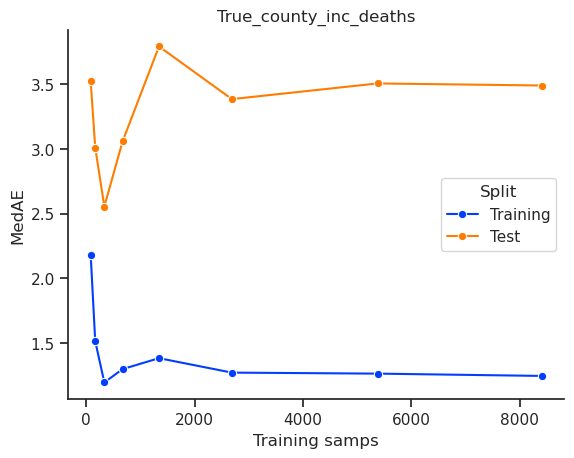

,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training samps,Split
0,4.40,2.18,-1.16,46.35,1.80,1.84,84.00,Training
1,2.62,1.52,0.11,19.19,1.07,1.09,168.00,Training
2,2.12,1.20,0.28,15.51,0.87,0.88,336.00,Training
3,2.13,1.30,0.35,13.92,0.87,0.89,672.00,Training
4,2.18,1.38,0.37,13.60,0.89,0.91,1344.00,Training
5,2.05,1.27,0.40,12.85,0.84,0.85,2688.00,Training
6,2.02,1.26,0.41,12.61,0.83,0.84,5376.00,Training
7,2.01,1.25,0.42,12.54,0.82,0.84,8400.00,Training


,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training samps,Split
8,5.71,3.52,0.00,69.35,1.03,1.03,84.00,Test
9,4.62,3.01,0.21,54.96,0.83,0.83,168.00,Test
10,4.28,2.56,0.21,55.28,0.77,0.77,336.00,Test
11,4.29,3.06,0.31,48.27,0.77,0.77,672.00,Test
12,4.57,3.79,0.35,45.51,0.82,0.82,1344.00,Test
13,4.36,3.39,0.36,44.83,0.78,0.78,2688.00,Test
14,4.41,3.51,0.35,45.03,0.79,0.79,5376.00,Test
15,4.38,3.49,0.36,44.71,0.79,0.79,8400.00,Test


  0%|          | 0/8 [00:00<?, ?it/s]

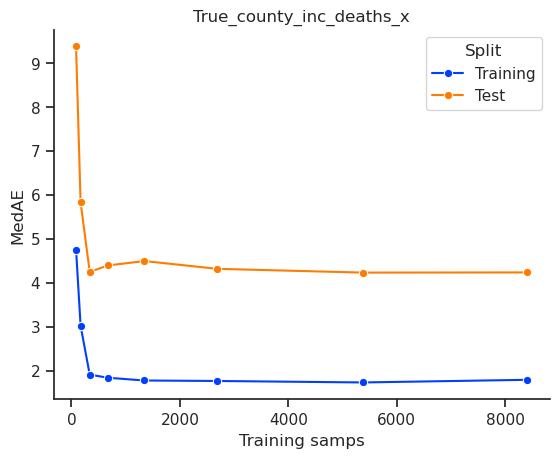

,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training samps,Split
0,30144641822.65,4.75,-154483330095503015936.00,4607455241668709056512.00,10702536597.38,11116340571.02,84.00,Training
1,15958971121716.69,3.02,-87762586409113332186349568.00,2617513414056337057377157120.00,5666064088324.06,5885137371867.84,168.00,Training
2,30763982814.26,1.91,-2204074103329610530816.00,65736366338906936836096.00,10922427073.04,11344732914.60,336.00,Training
3,6902602256.93,1.84,-159751960094189977600.00,4764591787656267956224.00,2450696004.50,2545449966.39,672.00,Training
4,2.91,1.77,0.15,25.25,1.03,1.07,1344.00,Training
5,2.81,1.76,0.18,24.39,1.00,1.04,2688.00,Training
6,2.77,1.73,0.19,24.07,0.98,1.02,5376.00,Training
7,2.78,1.79,0.20,23.87,0.99,1.03,8400.00,Training


,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training samps,Split
8,30144641825.03,9.37,-50499755365171634176.00,4607455241736497397760.00,5103223878.51,5161451960.98,84.00,Test
9,15958971121718.92,5.83,-28689109310823355589328896.00,2617513414056420070505054208.00,2701714055106.08,2732540770247.98,168.00,Test
10,30763982816.83,4.24,-720499764954449707008.00,65736366338890897817600.00,5208072884.73,5267497300.49,336.00,Test
11,6902602259.89,4.39,-52222041683950854144.00,4764591787643474280448.00,1168550115.18,1181883340.23,672.00,Test
12,6.03,4.49,0.03,88.20,1.02,1.03,1344.00,Test
13,5.85,4.31,0.05,86.82,0.99,1.00,2688.00,Test
14,5.84,4.23,0.04,88.02,0.99,1.00,5376.00,Test
15,5.86,4.23,0.04,87.94,0.99,1.00,8400.00,Test


In [13]:
targ = 'True_county_inc_deaths'
bpd = 'True_state_inc_deaths'
for which_target_col,bpd in [ ['True_county_inc_deaths','True_state_inc_deaths'], 
                 ['True_county_inc_deaths_x','True_state_inc_deaths_x']]:
    
    alg = 'LinReg'
                
# for which_target_col,bpd in [ ['True_county_inc_deaths','True_state_inc_deaths'] ]:
    list_test_dfs, list_train_dfs, training_fracs, df_train, df_test = get_train_test_res_dfs(which_target_col=which_target_col, 
                                     num_weeks_in_chunk=4, base_pred_cols=[bpd], algs=[alg]) # ,'ZIR'])
    
    pred_col = f'{alg} <{which_target_col}>'
    
    training_fracs = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.]

#     display(list_test_dfs[0])
    
    ## GET PERFORMANCE !
    from epsampling.modeling import get_metrics_ser

    metrics_sers = []
    for l,split in [[list_train_dfs,'Training'], [list_test_dfs,'Test']]:

        for i,dff in enumerate(l):
            ser = get_metrics_ser(dff, 
                                  target_col=which_target_col, 
                                  pred_col=pred_col)
            ser['Training frac'] = training_fracs[i]
            ser['Training samps'] = training_fracs[i] * len(df_train)
            ser['Split'] = split
            ## drop model attr bc only have one
            ser.pop('Model')
            metrics_sers.append(ser)

    df_metrics = pd.DataFrame(metrics_sers)

    ## PLOT !

    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(font_scale=1, style='ticks', palette='bright') 

    sns.lineplot(df_metrics, y='MedAE', x='Training samps', marker='o',hue='Split')
    sns.despine()
    plt.title(f'{which_target_col}')
    plt.show()
    
    df_metrics.drop('Training frac',axis=1,inplace=True)
    
    display(
        df_metrics[df_metrics.Split=='Training'],
            df_metrics[df_metrics.Split=='Test'])

In [18]:
# display(df_metrics[df_metrics.Split=='Training'],
#         df_metrics[df_metrics.Split=='Test'])

In [20]:
display(df_metrics[df_metrics.Split=='Training'],
        df_metrics[df_metrics.Split=='Test'])

,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training frac,Training samps,Split
0,4.40,2.18,-1.16,46.35,1.80,1.84,0.01,84.00,Training
1,2.62,1.52,0.11,19.19,1.07,1.09,0.02,168.00,Training
2,2.12,1.20,0.28,15.51,0.87,0.88,0.04,336.00,Training
3,2.13,1.30,0.35,13.92,0.87,0.89,0.08,672.00,Training
4,2.18,1.38,0.37,13.60,0.89,0.91,0.16,1344.00,Training
5,2.05,1.27,0.40,12.85,0.84,0.85,0.32,2688.00,Training
6,2.02,1.26,0.41,12.61,0.83,0.84,0.64,5376.00,Training
7,2.01,1.25,0.42,12.54,0.82,0.84,1.00,8400.00,Training


,MAE,MedAE,R-squared,MSE,relMAE (Proj),relMAE (True),Training frac,Training samps,Split
8,5.71,3.52,0.00,69.35,1.03,1.03,0.01,84.00,Test
9,4.62,3.01,0.21,54.96,0.83,0.83,0.02,168.00,Test
10,4.28,2.56,0.21,55.28,0.77,0.77,0.04,336.00,Test
11,4.29,3.06,0.31,48.27,0.77,0.77,0.08,672.00,Test
12,4.57,3.79,0.35,45.51,0.82,0.82,0.16,1344.00,Test
13,4.36,3.39,0.36,44.83,0.78,0.78,0.32,2688.00,Test
14,4.41,3.51,0.35,45.03,0.79,0.79,0.64,5376.00,Test
15,4.38,3.49,0.36,44.71,0.79,0.79,1.00,8400.00,Test


### <font color=blue> Train CS splits and look at per-county performance.

In [ ]:
target_col = 'True_county_inc_deaths'

# # # # # # # # # # # # # # # # # # # #
num_weeks_in_chunk = 4
num_runs = 20
alg = 'ZIR'

chunks = get_chunks(list(df.Date.unique()), num_weeks_in_chunk)
idc = random.sample(range(len(chunks)), num_runs)

test_dfs = []
models = {}

for i,idx in tqdm(enumerate(idc), total=len(idc)):
    
    df_train, df_test = get_date_chunked_splits(df, chunks, idx)
    
#     display(df_test.head())
        
    df_test[f'Run'] = i

#     for main_pred_col in ['True_state_inc_deaths_x','Proj_state_inc_deaths_x']:
    for main_pred_col in ['Naive_true_deaths','Naive_proj_deaths']:
        
        feats =  [main_pred_col] + BASE_PRED_COLS + [x for x in df_acs.columns] 
        X_train = df_train[feats]
        y_train = df_train[target_col]

        X_test = df_test[feats]
#         display(X_test[:5])
#         print('hi')

        reg = LinearRegression().fit(X_train, y_train)

        df_test[f'{alg}_({main_pred_col})'] = reg.predict(X_test)
        

    test_dfs.append(df_test)
    models[i] = reg
    
df_res = pd.concat(test_dfs)
df_res.drop(df_acs.columns,axis=1,inplace=True)

print(f'Training set size: {len(X_train)}\nTest set size: {len(X_test)}')